# Modelando o salto de Felix Baumgartner

### Importando bibliotecas e funções necessárias

In [246]:
#importações necessárias 
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


### Definindo alguns parâmetros gerais

In [247]:
altura=38970 # Altura do salto (m)
massa=160 # Massa do Felix com equipamentos (Kg)
K = 0.35 # Produto entre Cd e a área do félix com a roupa (m^2)
G = 6.67 * 1e-11 # Constante gravitacional Universal (N*m^2/Kg^2)
R = 6371 * 1e3 # Raio da Terra (m)
M = 5.98 * 1e24 # Massa da Terra (Kg)

# Dados Iniciais

y0=altura
v_0=0

CI=[y0, v_0]

# Lista tempo em segundos

dt=1
tf= 75
tempo=np.arange(0,tf,dt)


### Densidade do ar em função da altura

In [248]:
# Implementando a função densidade em relação a altura
def densidade(h):
    a=-(h/8882)
    densidade_ar=1.225*(e**a)

    return densidade_ar    


### Plotando o gráfico da densidade em função da altura

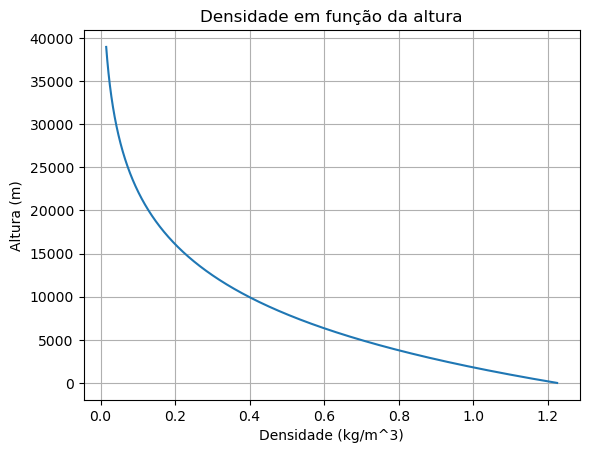

In [249]:
# Criando a lista de densidades
lista_densidade=[]
lista_altura=np.arange(0, altura, 1)
for i in lista_altura:
    lista_densidade.append(densidade(i))

# Plotando o gráfico

plt.plot(lista_densidade, lista_altura)
plt.title('Densidade em função da altura')
plt.xlabel('Densidade (kg/m^3)')
plt.ylabel('Altura (m)')
plt.grid()
plt.show()





### Criando a função modelo

In [250]:
def modelo(k, t_queda): 
    y = k[0]
    v = k[1]

    densi = densidade(y)
    
    F_arrasto = (1/2)*densi*K*(v**2)

    Peso = (G*M*massa)*(1/((R+y))**2)

    dydt = -v
    
    dvdt = (Peso - F_arrasto)/(massa)

    dkdt=[dydt, dvdt]
    return dkdt    

### Rodando a odeint e plotando o gráfico do modelo

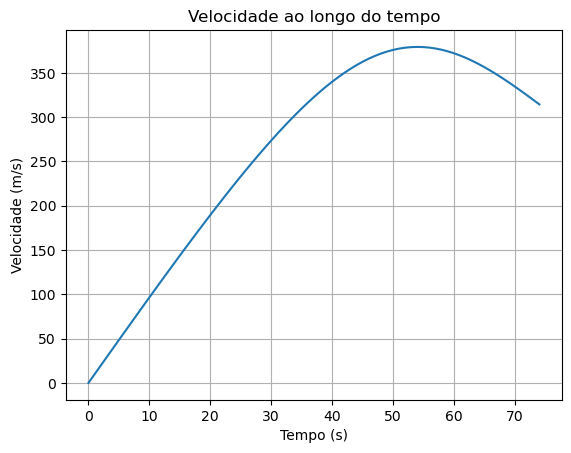

In [251]:
reso_numerica = odeint(modelo, CI, tempo)

lista_y =reso_numerica[:,0]
lista_v =reso_numerica[:,1]

plt.plot(tempo, lista_v)
plt.title('Velocidade ao longo do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid()
plt.show()

### Trazendo dados reais 

In [252]:
dados_reais = [0, 0,
5.93096234309623, 58.35714285714289,
11.29707112970711, 109.25000000000006,
19.20502092050209, 186.60714285714286,
25.135983263598323, 237.5,
29.937238493723843, 275.5,
33.04393305439329, 306.7142857142857,
38.97489539748953, 339.2857142857143,
44.90585774058576, 361,
49.98953974895396, 378.6428571428571,
56.767782426778226, 362.35714285714283,
59.87447698744769, 335.8928571428571,
62.416317991631786, 309.42857142857144,
]

# Separando os dados em duas listas: lista instante (s) e lista velocidade (m/s)
instante = []
velocidade = []
for i in range(len(dados_reais)):
    if i % 2 == 0:
        instante.append(dados_reais[i])
    else:
        velocidade.append(dados_reais[i])


### Plotando o gráfico de validação

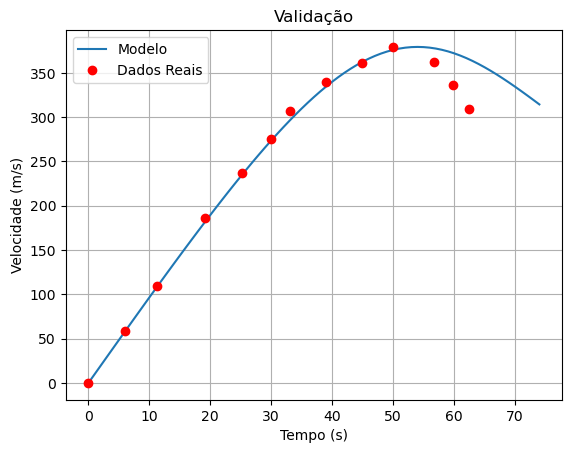

In [253]:
plt.plot(tempo, lista_v, label = "Modelo")
plt.plot(instante, velocidade, 'ro', label = "Dados Reais")
plt.legend()
plt.title('Validação')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid()
plt.show()

### Avaliando o formato do gráfico para diferentes alturas de salto

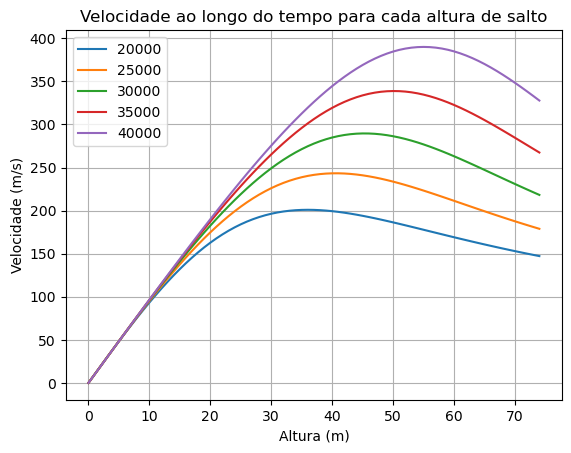

In [254]:
# Lista de alturas de salto
alturas = np.arange(20000, 45000, 5000)

# Plotando o gráfico de cada altura
for h in alturas:
    Cond_I = [h, v_0]
    dados = odeint(modelo, Cond_I, tempo)
    velocidades = dados[:,1]
    plt.plot(tempo, velocidades, label = f'{h}')

# Configurações do gráfico
plt.legend()
plt.title('Velocidade ao longo do tempo para cada altura de salto')
plt.xlabel('Altura (m)')
plt.ylabel('Velocidade (m/s)')
plt.grid()
plt.show()


### Montando o gráfico conclusivo

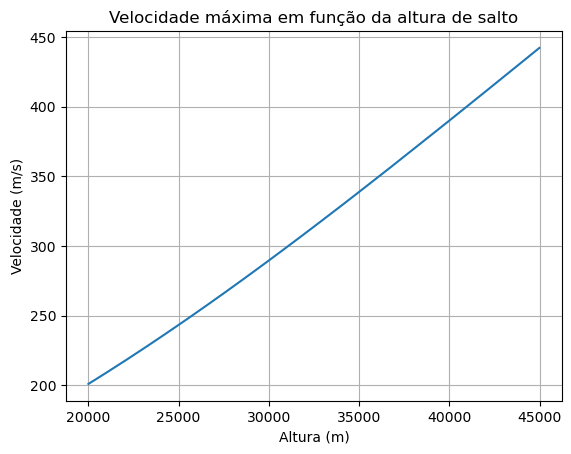

In [255]:
# Lista de alturas e criação a lista de velocidade máxima
alturas2 = np.arange(20000, 45000, 10)
vel_maximas = []

# Salvando a velocidade máxima para altura de salto na lista vel_maximas
for altura in alturas2:
    Cond_I=[altura, v_0]
    dados = odeint(modelo, Cond_I, tempo)
    velocidades = dados[:,1]
    vel_max = velocidades[0]
    for vel in velocidades:
        if vel > vel_max:
            vel_max = vel
    vel_maximas.append(vel_max)

# Plotando o gráfico e configurando suas características
plt.plot(alturas2, vel_maximas)
plt.title('Velocidade máxima em função da altura de salto')
plt.xlabel('Altura (m)')
plt.ylabel('Velocidade (m/s)')
plt.grid()
plt.show()
    